In [16]:
import requests
import pandas as pd
# from ..utils import clean_mess
import sys
from tqdm import tqdm
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
sys.path.append('/Users/taindp/Personal/chatbot_system')

In [3]:
from utils import clean_mess

In [6]:
def predict_lstm(mess):
    url = 'https://api-intent.herokuapp.com/predict'
    pred = requests.post(url,json={'message':mess})
    dict_pred = pred.json()
    return dict_pred
#     return dict_pred['intent'],dict_pred['probability'],dict_pred['message']

In [11]:
df_ = pd.read_csv('../data/crawl_testset.csv')
df_['content'] = [clean_mess(item) for item in list(df_['content'])]
idx2label = ['type_edu','case','career']
df_['target'] = [idx2label[item] for item in list(df_['target'])]

In [12]:
class_pred = []
score_pred = []
for item in tqdm(list(df_['content']),total=len(df_)):
    tmp_pred = predict_lstm(item)
    class_pred.append(tmp_pred['intent'])
    score_pred.append(tmp_pred['probability'])
    
df_['pred'] = class_pred
df_['score'] = score_pred

100%|██████████| 45/45 [00:59<00:00,  1.32s/it]


In [22]:
condition = (df_['target'] == df_['pred'])
df_condition = df_[condition]

In [33]:
import seaborn as sns
from matplotlib.pyplot import bar

In [40]:
tmp_df = df_condition[df_condition['target']=='career']['score']

<BarContainer object of 27 artists>

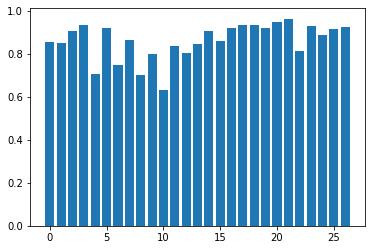

In [41]:
bar(list(range(len(tmp_df))),list(tmp_df))

In [19]:
# print(classification_report(df_['target'],df_['pred']))